In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',300)

In [3]:
df = pd.read_csv('../input/santander-customer-satisfaction/train.csv') #nrows=10000

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,...,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_0_ult1,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var13_medio_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var33_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_hace3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var17_ult1,num_reemb_var33_hace3,num_reemb_var33_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_va

**Dropping Constant Features**

In [5]:
from sklearn.feature_selection import VarianceThreshold
constant_features = VarianceThreshold(threshold=0.0)

In [6]:
constant_features.fit(df)
#checking the no of features exists, after dropping constant features
sum(constant_features.get_support())

337

In [7]:
constant_columns = [columns for columns in df.columns
                   if columns not in df.columns[constant_features.get_support()]]

len(constant_columns)

34

In [8]:
#dropping these constant columns from DataFrame
df.drop(constant_columns, axis=1, inplace=True)

In [9]:
df.shape

(76020, 337)

In [10]:
#features = [x for x in df.columns if x not in df.columns[quasi.get_support()]]

In [11]:
# percentage of observations showing each of the different values
df['ind_var1_0'].value_counts() / np.float(len(df))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0    0.988542
1    0.011458
Name: ind_var1_0, dtype: float64

print('Number of variables before removing constant: ', X_train.shape[1])

X_train = constant.transform(X_train)
X_test = constant.transform(X_test)

print('Number of variables after removing constant: ', X_train.shape[1])

In [12]:
pip install feature-engine --quiet

Note: you may need to restart the kernel to use updated packages.


In [13]:
from feature_engine.selection import DropCorrelatedFeatures,DropConstantFeatures,DropDuplicateFeatures

In [14]:
# with tol=0.999 this will remove the features where the 99.9% values are sa,e only 0.01 percent uniqueness

quasi_constant = DropConstantFeatures(tol=0.998)
# find quasi-constant features in the train set
quasi_constant.fit(df)

DropConstantFeatures(tol=0.998)

In [15]:
len(quasi_constant.features_to_drop_)

143

In [16]:
print('Number of variables before removing quasi-constant: ', df.shape[1])

df = quasi_constant.transform(df)

print('Number of variables after removing quasi-constant: ', df.shape[1])

Number of variables before removing quasi-constant:  337
Number of variables after removing quasi-constant:  194


**Removing the similar or duplicated features**

**Some usefull**
fit:Find duplicated features.

fit_transform:Fit to data, then transform it.

get_feature_names_out:Get output feature names for transformation.

transform:Remove duplicated features.

In [17]:
drop_duplicates = DropDuplicateFeatures()
drop_duplicates.fit(df)

DropDuplicateFeatures()

In [18]:
#this will give the identical features
drop_duplicates.duplicated_feature_sets_

#duplicates.features_to_drop_

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [19]:
#to check these features are equal or identical , we can use equals reslts true is same else false.
df['ind_var39'].equals(df['ind_var40'])

True

In [20]:
# checking the data in these two columns
df[['ind_var39','ind_var40']].head()

,ind_var39,ind_var40
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
#dropping the dupliacte features
print('Number of variables before removing duplicates: ', df.shape[1])

df = drop_duplicates.transform(df)

print('Number of variables after removing duplicates: ', df.shape[1])

Number of variables before removing duplicates:  194
Number of variables after removing duplicates:  186


**Dropping Correlated Features**

In [22]:
related = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)

In [23]:
# finding correlated features in dataframe
related.fit(df)

DropCorrelatedFeatures(threshold=0.85)

In [24]:
related.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'},
 {'imp_op_var40_ult1', 'saldo_var40'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_ult1'},
 {'imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5_0', 'ind_var8_0', 'num_var5_0', 'num_var8_0'},
 {'ind_var5', 'num_meses_var5_ult3', 'num_var5'},
 {'ind_var8', 'num_meses_var8_ult3', 'num_var8'},
 {'ind_var12_0', 'num_var12_0'},
 {'ind_var12',
  'ind_var24',
  'ind_var24_0',
  'num_meses_var12_ult3',
  'num_var12',
  'num_var24',
  'num_var24_0'},
 {'ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_

In [25]:
len(related.features_to_drop_)

94

In [26]:
print('Number of variables before removing correlated: ', df.shape[1])

df = related.transform(df)


print('Number of variables after removing correlated: ', df.shape[1])

Number of variables before removing correlated:  186
Number of variables after removing correlated:  92


In [27]:
X = df.drop('TARGET',axis=1)
y =df.iloc[:,-1]

**Resampling Using Smote**

In [28]:
from imblearn.over_sampling import SMOTE
sampling = SMOTE()

In [29]:
X_scaled, y_ = sampling.fit_resample(X,y)

In [30]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_, random_state=41, stratify = y_,shuffle=True)

**Model Building**

In [31]:
from sklearn.metrics import classification_report,plot_roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [32]:
models = {'forest' : RandomForestClassifier(),
          'boost' : GradientBoostingClassifier(),
          'xgboost' : XGBClassifier()}

Classification report for forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18253
           1       0.96      0.96      0.96     18253

    accuracy                           0.96     36506
   macro avg       0.96      0.96      0.96     36506
weighted avg       0.96      0.96      0.96     36506




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Classification report for boost
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     18253
           1       0.91      0.93      0.92     18253

    accuracy                           0.92     36506
   macro avg       0.92      0.92      0.92     36506
weighted avg       0.92      0.92      0.92     36506




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Classification report for xgboost
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     18253
           1       0.93      0.95      0.94     18253

    accuracy                           0.94     36506
   macro avg       0.94      0.94      0.94     36506
weighted avg       0.94      0.94      0.94     36506




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


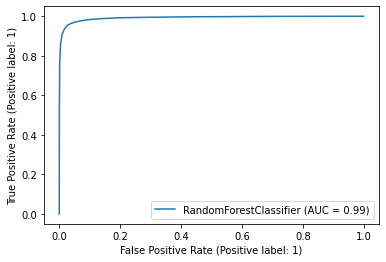

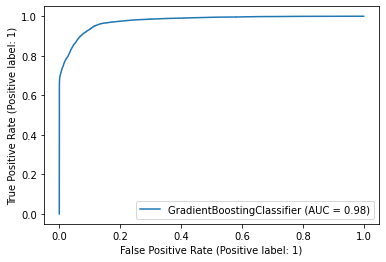

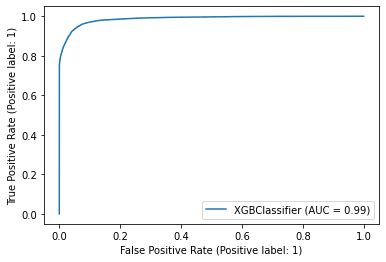

In [36]:
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Classification report for {model_name}')
    print(classification_report(y_test,y_pred))
    print('')
    plot_roc_curve(model,X_test,y_test)

**Submission**

In [40]:
test = pd.read_csv('../input/santander-customer-satisfaction/test.csv')

In [45]:
xgboost = XGBClassifier()

In [60]:
test_ = pipe.fit(test)

In [ ]:
probs = xgboost.predict_proba(test_)

final_df = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
probs.to_csv("submission.csv", index=False)